In [29]:
import math 
class MinHeap:
    def __init__(self, data):
        self.items = data
        self.length = len(data)
        self.build_heap()

        # add a map based on input node
        self.map = {}
        for i in range(self.length):
            self.map[self.items[i].value] = i

    def find_left_index(self,index):
        return 2 * (index + 1) - 1

    def find_right_index(self,index):
        return 2 * (index + 1)

    def find_parent_index(self,index):
        return (index + 1) // 2 - 1  
    
    def sink_down(self, index):
        smallest_known_index = index

        if self.find_left_index(index) < self.length and self.items[self.find_left_index(index)].key < self.items[index].key:
            smallest_known_index = self.find_left_index(index)

        if self.find_right_index(index) < self.length and self.items[self.find_right_index(index)].key < self.items[smallest_known_index].key:
            smallest_known_index = self.find_right_index(index)

        if smallest_known_index != index:
            self.items[index], self.items[smallest_known_index] = self.items[smallest_known_index], self.items[index]
            
            # update map
            self.map[self.items[index].value] = index
            self.map[self.items[smallest_known_index].value] = smallest_known_index

            # recursive call
            self.sink_down(smallest_known_index)

    def build_heap(self,):
        for i in range(self.length // 2 - 1, -1, -1):
            self.sink_down(i) 

    def insert(self, node):
        if len(self.items) == self.length:
            self.items.append(node)
        else:
            self.items[self.length] = node
        self.map[node.value] = self.length
        self.length += 1
        self.swim_up(self.length - 1)

    def insert_nodes(self, node_list):
        for node in node_list:
            self.insert(node)

    def swim_up(self, index):
        
        while index > 0 and self.items[self.find_parent_index(index)].key < self.items[self.find_parent_index(index)].key:
            #swap values
            self.items[index], self.items[self.find_parent_index(index)] = self.items[self.find_parent_index(index)], self.items[index]
            #update map
            self.map[self.items[index].value] = index
            self.map[self.items[self.find_parent_index(index)].value] = self.find_parent_index(index)
            index = self.find_parent_index(index)

    def get_min(self):
        if len(self.items) > 0:
            return self.items[0]

    def extract_min(self,):
        #xchange
        self.items[0], self.items[self.length - 1] = self.items[self.length - 1], self.items[0]
        #update map
        self.map[self.items[self.length - 1].value] = self.length - 1
        self.map[self.items[0].value] = 0

        min_node = self.items[self.length - 1]
        self.length -= 1
        self.map.pop(min_node.value)
        self.sink_down(0)
        return min_node

    def decrease_key(self, value, new_key):
        if new_key >= self.items[self.map[value]].key:
            return
        index = self.map[value]
        self.items[index].key = new_key
        self.swim_up(index)

    def get_element_from_value(self, value):
        return self.items[self.map[value]]

    def is_empty(self):
        return self.length == 0
    
    def __str__(self):
        height = math.ceil(math.log(self.length + 1, 2))
        whitespace = 2 ** height + height
        s = ""
        for i in range(height):
            for j in range(2 ** i - 1, min(2 ** (i + 1) - 1, self.length)):
                s += " " * whitespace
                s += str(self.items[j]) + " "
            s += "\n"
            whitespace = whitespace // 2
        return s
class Item:
    def __init__(self, value, key):
        self.key = key
        self.value = value
    
    def __str__(self):
        return "(" + str(self.key) + "," + str(self.value) + ")"
    
class WeightedGraph:
    def __init__(self, nodes):
        self.graph = [[] for _ in range(nodes)]
        self.weights = {}

    def add_edge(self, node1, node2, weight):
        self.graph[node1].append(node2)
        self.weights[(node1, node2)] = weight

    def get_weights(self, node1, node2):
        return self.weights.get((node1, node2))

    def get_neighbors(self, node):
        return self.graph[node]

    def get_number_of_nodes(self):
        return len(self.graph)

    def get_nodes(self):
        return [i for i in range(len(self.graph))]
    
    def get_edges(self):
        edges = []
        for node1 in range(len(self.graph)):
            for node2 in self.graph[node1]:
                weight = self.get_weights(node1, node2)
                edges.append((node1, node2, weight))
        return edges

    def __iter__(self):
        return iter(self.graph)


## 1.1


In [30]:
def dijkstra(Graph,source):

    visited = {}
    distance = {}

    # create empty queue
    Q = MinHeap([])

    for i in range(Graph.get_number_of_nodes()):

        visited[i] = False
        distance[i] = float("inf")

        # insert the nodes in the minheap
        Q.insert(Item(i, float("inf")))

    print(Q)

    # assign 0 to source 
    Q.decrease_key(source, 0)
    distance[source] = 0

    while not (Q.is_empty() ):
        # get current node
        current_node = Q.extract_min().value
        visited[current_node] = True

        for neighbour in Graph.graph[current_node]:
            # get weight of current node
            edge_weight = Graph.get_weights(current_node, neighbour)

            temp = distance[current_node] + edge_weight

            # not visited yet
            if not visited[neighbour]:
                if temp < distance[neighbour]:
                    distance[neighbour] = temp
                    Q.decrease_key(neighbour, temp)

    return distance

In [31]:
g= WeightedGraph(6)

g.add_edge(0,1,15)
g.add_edge(1,0,15)

g.add_edge(1,2,10)
g.add_edge(2,1,10)

g.add_edge(2,3,5)
g.add_edge(3,2,5)

g.add_edge(1,3,20)
g.add_edge(3,1,20)

g.add_edge(2,4,30)
g.add_edge(4,2,30)

g.add_edge(4,3,25)
g.add_edge(3,4,25)

g.add_edge(3,5,40)
g.add_edge(5,3,40)

g.add_edge(4,5,15)
g.add_edge(5,4,15)


In [32]:
dijkstra(g,1)

           (inf,0) 
     (inf,1)      (inf,2) 
  (inf,3)   (inf,4)   (inf,5) 



{0: inf, 1: 0, 2: 10, 3: 15, 4: inf, 5: 55}

In [33]:
def dijkstra(Graph,source,destination):

    visited = {}
    distance = {}

    # create empty queue
    Q = MinHeap([])

    for i in range(Graph.get_number_of_nodes()):

        visited[i] = False
        distance[i] = float("inf")

        # insert the nodes in the minheap
        Q.insert(Item(i, float("inf")))

    print(Q)

    # assign 0 to source 
    Q.decrease_key(source, 0)
    distance[source] = 0

    while not (Q.is_empty() or visited[destination]):
        # get current node
        current_node = Q.extract_min().value
        visited[current_node] = True

        for neighbour in Graph.graph[current_node]:
            # get weight of current node
            edge_weight = Graph.get_weights(current_node, neighbour)

            temp = distance[current_node] + edge_weight

            # not visited yet
            if not visited[neighbour]:
                if temp < distance[neighbour]:
                    distance[neighbour] = temp
                    Q.decrease_key(neighbour, temp)

    return distance[destination]

In [34]:
g= WeightedGraph(6)

g.add_edge(0,1,15)
g.add_edge(1,0,15)

g.add_edge(1,2,10)
g.add_edge(2,1,10)

g.add_edge(2,3,5)
g.add_edge(3,2,5)

g.add_edge(1,3,20)
g.add_edge(3,1,20)

g.add_edge(2,4,30)
g.add_edge(4,2,30)

g.add_edge(4,3,25)
g.add_edge(3,4,25)

g.add_edge(3,5,40)
g.add_edge(5,3,40)

g.add_edge(4,5,15)
g.add_edge(5,4,15)
dijkstra(g,1,5)

           (inf,0) 
     (inf,1)      (inf,2) 
  (inf,3)   (inf,4)   (inf,5) 



55

In [35]:
def dijkstra_relax(Graph, source, k):
    visited = {}
    distance = {}
    relax_count = {}  
    predecessor = {} 

    Q = MinHeap([])

    for i in range(Graph.get_number_of_nodes()):
        visited[i] = False
        distance[i] = float("inf")
        relax_count[i] = 0 
        predecessor[i] = None  

        Q.insert(Item(i, 0))


    Q.decrease_key(source, 0)
    distance[source] = 0

    while not Q.is_empty():
        current_node = Q.extract_min().value
        visited[current_node] = True

        for neighbour in Graph.graph[current_node]:
            edge_weight = Graph.get_weights(current_node, neighbour)
            temp = distance[current_node] + edge_weight
            if not visited[neighbour]:
                if temp < distance[neighbour]:
                    distance[neighbour] = temp
                    Q.decrease_key(neighbour, temp)
                    relax_count[neighbour] += 1  
                    predecessor[neighbour] = current_node  
        if relax_count[current_node] >= k:
            break

    def k_path(node, predecessor, path=[]):
        if node is None:
            return path
        path.insert(0, node)
        return k_path(predecessor[node], predecessor, path)
    shortest_paths = {}
    node = 0
    while True:
        shortest_paths[node] = k_path(node, predecessor)
        node += 1
        if node >= Graph.get_number_of_nodes():
            break

    return distance, shortest_paths


using dict visited, distance, relax_count, pred to track visited nodes, shortest dist, relax count and pred for each node. 

In [36]:
# Create the weighted graph
g = WeightedGraph(6)

g.add_edge(0, 1, 15)
g.add_edge(1, 0, 15)
g.add_edge(1, 2, 10)
g.add_edge(2, 1, 10)
g.add_edge(2, 3, 5)
g.add_edge(3, 2, 5)
g.add_edge(1, 3, 20)
g.add_edge(3, 1, 20)
g.add_edge(2, 4, 30)
g.add_edge(4, 2, 30)
g.add_edge(4, 3, 25)
g.add_edge(3, 4, 25)
g.add_edge(3, 5, 40)
g.add_edge(5, 3, 40)
g.add_edge(4, 5, 15)
g.add_edge(5, 4, 15)

source_node = 0
k = 2
x = dijkstra_relax(g, source_node, k)
print(x)


({0: 0, 1: 15, 2: inf, 3: inf, 4: inf, 5: inf}, {0: [5, 4, 3, 2, 0, 1, 0], 1: [5, 4, 3, 2, 0, 1, 0], 2: [5, 4, 3, 2, 0, 1, 0], 3: [5, 4, 3, 2, 0, 1, 0], 4: [5, 4, 3, 2, 0, 1, 0], 5: [5, 4, 3, 2, 0, 1, 0]})


## 1.2


In [37]:

#original bellman ford was inspired from https://www.geeksforgeeks.org/bellman-ford-algorithm-dp-23/ 
def bellamford_relax(graph, source, k):
  
    distance = {node: float('inf') for node in graph.get_nodes()}
    predecessor = {node: None for node in graph.get_nodes()}
    distance[source] = 0

    for _ in range(k):
        relaxed = False
        for u, v, weight in graph.get_edges():
            if distance[u] + weight < distance[v]:
                distance[v] = distance[u] + weight
                predecessor[v] = u
                relaxed = True
        else:
            break

        for u in graph.get_nodes():
            for v in graph.get_neighbors(u):
                weight = graph.get_weights(u, v)
                if distance[u] + weight < distance[v]:
                    return None

    def k_path(node, predecessor, path=[]):
        if node is None:
            return path
        path.insert(0, node)
        return k_path(predecessor[node], predecessor, path)

    shortest_paths = {}
    for node in graph.get_nodes():
        shortest_paths[node] = k_path(node, predecessor)

    return distance, shortest_paths





In [38]:


g = WeightedGraph(6)

g.add_edge(0, 1, 15)
g.add_edge(1, 0, 15)
g.add_edge(1, 2, 10)
g.add_edge(2, 1, 10)
g.add_edge(2, 3, 5)
g.add_edge(3, 2, 5)
g.add_edge(1, 3, 20)
g.add_edge(3, 1, 20)
g.add_edge(2, 4, 30)
g.add_edge(4, 2, 30)
g.add_edge(4, 3, 25)
g.add_edge(3, 4, 25)
g.add_edge(3, 5, 40)
g.add_edge(5, 3, 40)
g.add_edge(4, 5, 15)
g.add_edge(5, 4, 15)
shortest_distance = bellamford_relax(g, 0, 2)
print(shortest_distance)

({0: 0, 1: 15, 2: 25, 3: 30, 4: 55, 5: 70}, {0: [0, 1, 2, 3, 5, 0, 1, 2, 4, 0, 1, 2, 3, 0, 1, 2, 0, 1, 0], 1: [0, 1, 2, 3, 5, 0, 1, 2, 4, 0, 1, 2, 3, 0, 1, 2, 0, 1, 0], 2: [0, 1, 2, 3, 5, 0, 1, 2, 4, 0, 1, 2, 3, 0, 1, 2, 0, 1, 0], 3: [0, 1, 2, 3, 5, 0, 1, 2, 4, 0, 1, 2, 3, 0, 1, 2, 0, 1, 0], 4: [0, 1, 2, 3, 5, 0, 1, 2, 4, 0, 1, 2, 3, 0, 1, 2, 0, 1, 0], 5: [0, 1, 2, 3, 5, 0, 1, 2, 4, 0, 1, 2, 3, 0, 1, 2, 0, 1, 0]})


## 1.3

In [39]:
import random

def gen_graph(n):
    graph = WeightedGraph(n)
    
    for n1 in range(n):
        for n2 in range(n1 + 1, n):  
            if random.random() < 0.5:  
                weight = random.randint(1, 10) 
                graph.add_edge(n1, n2, weight)
                graph.add_edge(n2, n1, weight)
    
    return graph


x=gen_graph(5)
print(dijkstra_relax(x,0,4))
print(bellamford_relax(x,0,4))

({0: 0, 1: 2, 2: inf, 3: inf, 4: 2}, {0: [0, 4, 3, 2, 0, 1, 0], 1: [0, 4, 3, 2, 0, 1, 0], 2: [0, 4, 3, 2, 0, 1, 0], 3: [0, 4, 3, 2, 0, 1, 0], 4: [0, 4, 3, 2, 0, 1, 0]})
({0: 0, 1: 2, 2: 3, 3: 12, 4: 2}, {0: [0, 4, 0, 1, 3, 0, 1, 2, 0, 1, 0], 1: [0, 4, 0, 1, 3, 0, 1, 2, 0, 1, 0], 2: [0, 4, 0, 1, 3, 0, 1, 2, 0, 1, 0], 3: [0, 4, 0, 1, 3, 0, 1, 2, 0, 1, 0], 4: [0, 4, 0, 1, 3, 0, 1, 2, 0, 1, 0]})


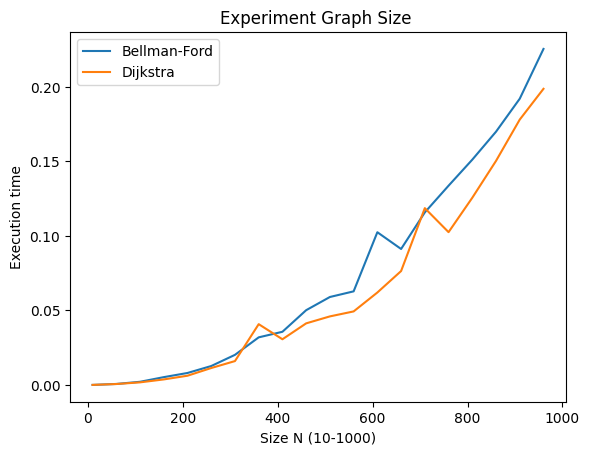

In [40]:
import timeit
import matplotlib.pyplot as plt
import numpy as np

def experiment_graph_size():

  bellman_time = []
  dijkstra_time = []

  for n in range(10, 1000, 50):
    g1 = gen_graph(n)
    g2 = g1  

    # belman 
    start = timeit.default_timer()
    bellamford_relax(g1, 0, n-1)
    stop = timeit.default_timer()
    bellman_time.append(stop - start)

    # dijkst
    start = timeit.default_timer()
    dijkstra_relax(g2, 0, n-1)
    stop = timeit.default_timer()
    dijkstra_time.append(stop - start)


  plt.plot(np.arange(10, 1000, 50), bellman_time, label='Bellman-Ford')
  plt.plot(np.arange(10, 1000, 50), dijkstra_time, label='Dijkstra')
  plt.xlabel('Size N (10-1000)')
  plt.ylabel('Execution time')
  plt.title('Experiment Graph Size ')
  plt.legend()
  plt.show()

experiment_graph_size()

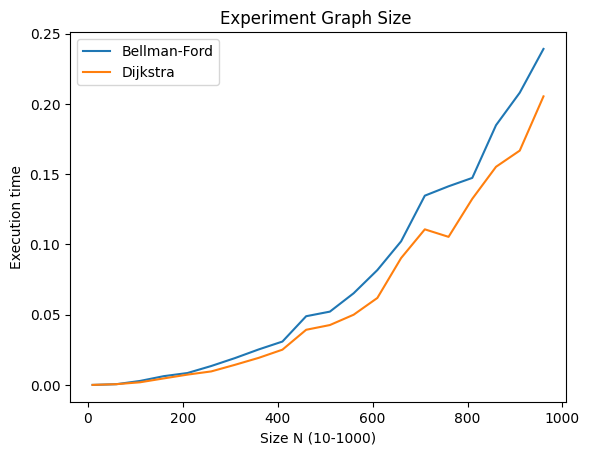

In [41]:
def experiment_graph_density():
    bellman_time = []
    dijkstra_time = []

    graph = WeightedGraph(5)
    graph.add_edge(0, 1, 4)
    graph.add_edge(0, 2, 2)

    for n in range(10, 2000, 50):
        random_node = random.randint(1, min(n-1, 4))  
        weight = random.randint(5, 10)
        graph.add_edge(0, random_node, weight)

        #belllman
        start = timeit.default_timer()
        bellamford_relax(graph, 0, n-1)
        stop = timeit.default_timer()
        bellman_time.append(stop - start)

        #  Dijkstra
        start = timeit.default_timer()
        dijkstra_relax(graph, 0, n-1)
        stop = timeit.default_timer()
        dijkstra_time.append(stop - start)

    # Plot the results
    plt.plot(np.arange(10, 2000, 50), bellman_time, label='Bellman-Ford')
    plt.plot(np.arange(10, 2000, 50), dijkstra_time, label='Dijkstra')
    plt.xlabel('Density from source node')
    plt.ylabel('Execution time')
    plt.title('Experiment Graph Density ')
    plt.legend()
    plt.show()

experiment_graph_size()

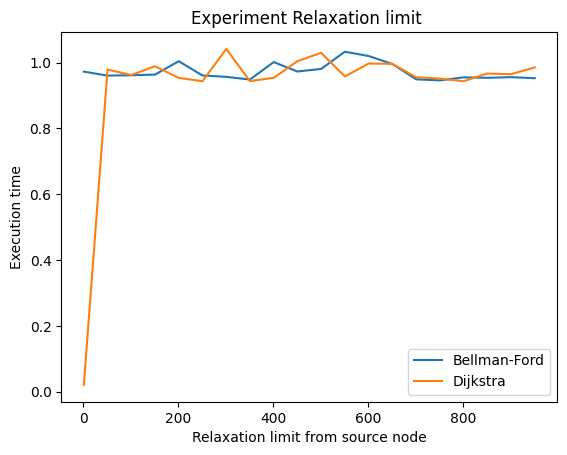

In [43]:
def experiment_graph_relaxation():
    bellman_times = []
    dijkstra_times = []
    g = gen_graph(1000)

    for k in range(1, 1000, 50):
        # bellman
        start = timeit.default_timer()
        bellamford_relax(g, 0, k)
        stop = timeit.default_timer()
        bellman_times.append(stop - start)

        #  Dijkstra
        start = timeit.default_timer()
        dijkstra_relax(g, 0, k)
        stop = timeit.default_timer()
        dijkstra_times.append(stop - start)

    plt.plot(range(1, 1000, 50), bellman_times, label='Bellman-Ford')
    plt.plot(range(1, 1000, 50), dijkstra_times, label='Dijkstra')
    plt.xlabel('Relaxation limit from source node')
    plt.ylabel('Execution time')
    plt.title('Experiment Relaxation limit ')
    plt.legend()
    plt.show()

experiment_graph_relaxation()

# 1

# 2

# 3

# 4

In [ ]:
print("hi")